In [1]:
import pandas as pd
from io import StringIO 
import numpy as np
import matplotlib.pyplot as plt
import math

### A table of Popcorn's weight gain

In [2]:
rawString = """age (days)	weight (lbs)
56	8.4
58	9.4
61	9.8
62	10
63	10.2
64	10.8
65	11.8
66	12.2
67	12.8
68	12.8
69	13.2
71	13.6
73	14.6
74	15.8
76	16.4
77	16.8""";
StringData = StringIO(rawString)
df = pd.read_csv(StringData, sep ="\t") 
df

,age (days),weight (lbs)
0,56,8.4
1,58,9.4
2,61,9.8
3,62,10.0
4,63,10.2
5,64,10.8
6,65,11.8
7,66,12.2
8,67,12.8
9,68,12.8


This table has all the information but isn't very easy to read and doesn't show us patterns in his weight.

### Let's try a bar graph

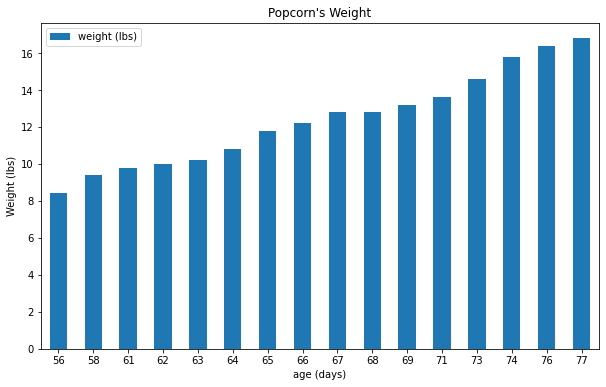

In [3]:
df.plot.bar(x='age (days)', y='weight (lbs)', rot=0,figsize=(10,6),
            title="Popcorn's Weight",ylabel='Weight (lbs)');

We've seen bar graphs before.  But a bar graph is not good for this data because the dates on the bottom are not even.  Some bars are one day apart and some bars are two or three days apart.  This gives a false look to the data.

### Let's try a stem plot (also called a lollipop plot)

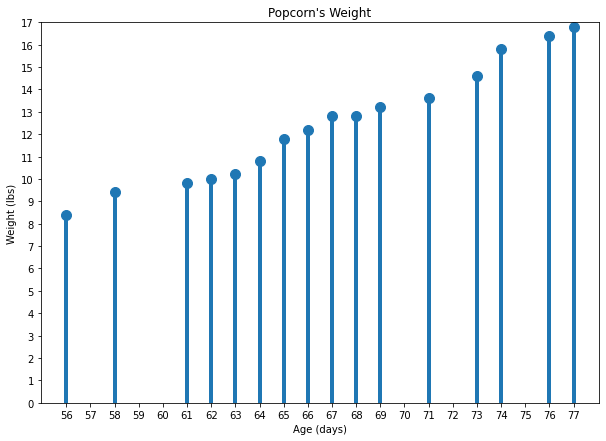

In [4]:
ages = df['age (days)'].values.tolist()
weights = df['weight (lbs)'].values.tolist()
(xmin0,xmax0) = (min(ages),max(ages))
fig, ax = plt.subplots()
fig.set_size_inches(10,7)
(markers, stemlines, baseline) = ax.stem(ages, weights);
plt.setp(baseline, visible=False)
plt.setp(stemlines, 'linewidth', 4)
plt.setp(markers, markersize = 10)
ax.margins(y=0)
ax.set_title("Popcorn's Weight");
ax.set_xlabel('Age (days)');
ax.set_ylabel('Weight (lbs)');
ax.set_xticks(range(xmin0,xmax0+1,1));
ax.set_yticks(range(0,math.ceil(max(weights)+1),1));

<b>Q: What is different about how this plot shows the data?</b><br>


This is similar to a bar graph.  Instead of bars it uses dots on top of lines.  The height of the dot tells us the weight on that day.  Notice how the day values now sometimes have gaps in them.  This is because they are correctly spaced now.

### Add grid lines so it's easier to read

It's a bit hard to read some of the values because the dots are so far from the numbers.  We can add horizontal lines at every pound marker to help us read the plot.

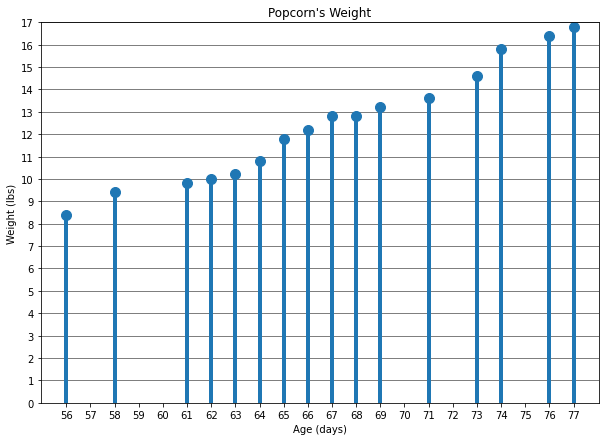

In [6]:
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black',axis='y')
ax.set_yticks(np.arange(0,18,1),minor=False)

fig

### Add some more grid lines for half pound weights

It's still a little hard to read weights that are betwen pounds.  Let's add ever more lines.  These will be smaller lines marking off half-pounds.

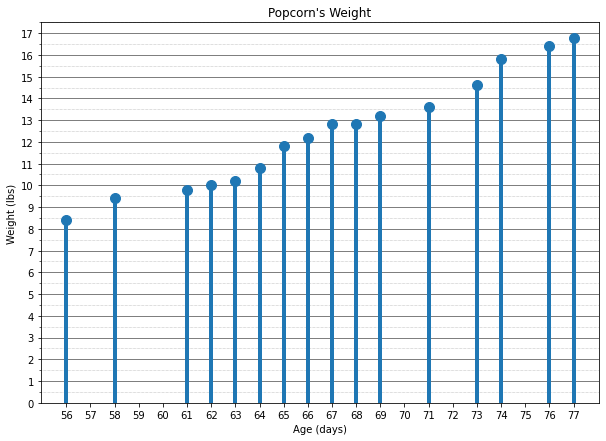

In [7]:
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black',axis='y')
ax.minorticks_on()
ax.set_xticks((),minor=True)
ax.set_yticks(np.arange(0,18,0.5),minor=True)
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray',axis='y')
fig

<b>Q: What was his weight at 62 days?</b><br>

<b>Q: What was his weight at 71 days?</b><br>

<b>Q: What was his weight at 57 days?</b><br>


### Let's look a little forward and a little backwards

The plot shows us his weights for all the days we have measured him.  Can we use this information to guess what his weight was before we started measuring, and what it might be in the future?

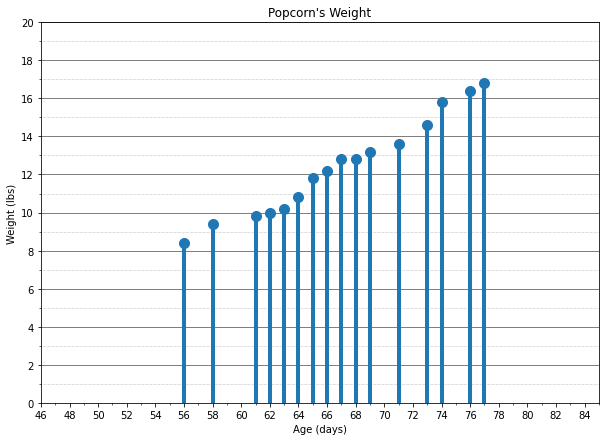

In [9]:
(xmin1,xmax1)=(46,85);
(ymin1,ymax1)=(0,20);
ax.set_xlim((xmin1,xmax1))
ax.set_xticks(range(xmin1,xmax1+1,2))
ax.set_xticks(range(xmin1,xmax1+1,1),minor=True)
ax.set_ylim((ymin1,ymax1))
ax.set_yticks(range(ymin1,ymax1+1,2))
ax.set_yticks(range(ymin1,ymax1+1,1),minor=True)
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray',axis='y')
fig

<b>Q: What do we think his weight was at 50 days old?</b><br>

<b>Q: What do we think his weight will be at 80 days old?</b><br>


### Let's draw a straight line through the points (as best we can)

Even though the weights are wiggling a little, they roughly go up in a straight line.  Let's draw a straight line through the measurement points.

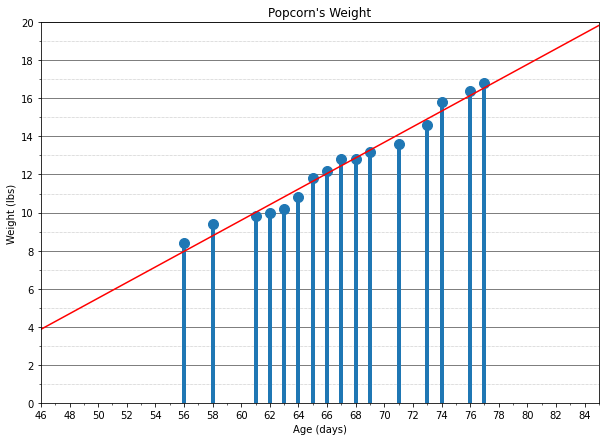

In [11]:
d = np.polyfit(ages,weights,1)
f = np.poly1d(d)
newAges = range(xmin1,xmax1+1)
ax.plot(newAges,f(newAges),color='Red')
fig

This line is a little bit too high in some places and a little bit too low in others, but on average it's the best line to match all the measured points.

Now it's easier to guess what his weight was in the past, and what it will be in the future

We can make it easier still by marking the exact spots on the line that we are interested in

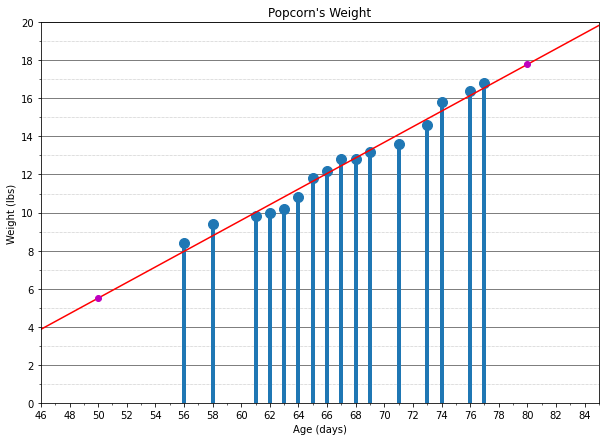

In [12]:
ax.plot(50,f(50),'mo')
ax.plot(80,f(80),'mo')
fig

<b>Q: Use the line to guess his weight at 50 days</b><br>

<b>Q: Use the line to guess his weight at 80 days</b><br>


### Let's extend our predictions back to his birth, and up to one year old

We can stretch the line even further in both directions to guess what his weight was back on the day he was born, and in the future when he's one year old

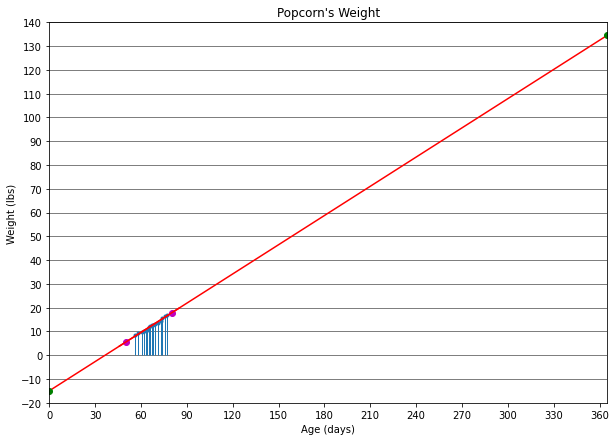

In [13]:
(xmin2,xmax2,ymin2,ymax2) = (0,365,-20,140)
ax.set_xlim((xmin2,xmax2))
ax.set_xticks(range(xmin2,xmax2+1,30))
ax.set_ylim((ymin2,ymax2))
ax.set_yticks(range(ymin2,ymax2+1,10))
ax.plot(range(xmin2,xmax2+1),f(range(xmin2,xmax2+1)),color='Red')
ax.minorticks_off()
plt.setp(stemlines, 'linewidth', 1)
plt.setp(markers, markersize = 3)
ax.plot(0,f(0),'go')
ax.plot(365,f(365),'go')
fig

<b>Q: How much will he weigh at 1 year old?</b><br>

<b>Q: How much did he weigh when he was born?</b><br>

<b>Q: Are these reasonable answers?</b><br>

<b>Q: What does that tell us?</b><br>
